In [6]:
import pandas as pd  
import numpy as np
from pandas_datareader import data, wb
import datetime
import scipy.optimize as sco
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
tickers = ['AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 12, 31)

df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [8]:
df

,AXP,AAPL,BA,CAT,CSCO,CVX,DD,XOM,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,35.126514,26.538483,43.441975,43.348061,19.112885,53.826290,33.669952,49.342556,10.759819,150.662186,...,12.024070,12.965309,44.352589,38.967796,27.007914,56.385876,19.130995,18.132669,42.309753,27.933924
2010-01-05,35.049255,26.584366,44.864773,43.866306,19.027733,54.207569,35.169987,49.535217,10.815536,153.325790,...,12.071914,12.780386,44.367104,38.044659,26.965084,55.543621,19.165483,17.924887,41.888462,27.864237
2010-01-06,35.615814,26.161509,46.225727,43.999580,18.903877,54.214378,35.793083,49.963345,10.759819,151.689255,...,11.998314,12.739288,44.156658,37.504848,27.230623,55.252354,18.632231,17.684185,41.794838,27.716166
2010-01-07,36.193455,26.113146,48.097031,44.177265,18.989027,54.010117,35.816158,49.806370,11.316964,154.657593,...,12.116073,12.691346,43.917198,38.044659,28.275644,55.488537,18.521328,17.848776,41.818237,27.724878
2010-01-08,36.167606,26.286753,47.633064,44.673309,19.089663,54.105431,35.943092,49.606567,11.560715,151.732819,...,12.092153,12.794081,43.859142,37.989880,28.010105,55.598721,18.533001,17.898142,41.607594,27.768419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,87.901848,144.314041,285.834320,112.934288,38.887367,95.925880,68.688713,61.631020,6.627234,153.191833,...,67.386330,38.702988,84.468437,110.087631,229.066162,99.334053,50.372406,120.778961,84.116425,99.138412
2018-12-26,92.164337,154.476852,305.044769,120.476097,41.001652,102.004959,73.082352,64.575691,7.077350,159.638916,...,72.244881,40.268284,87.108070,114.525146,239.303040,103.178558,51.692249,129.212540,88.615326,104.552254
2018-12-27,92.989334,153.474335,308.163910,122.320511,41.426445,103.838173,74.621513,64.857918,6.962427,162.068832,...,72.897957,40.898224,88.974197,115.991295,241.879486,102.935226,52.366417,130.978653,89.771889,105.233910


In [9]:
returns = df.pct_change()

In [10]:
returns

,AXP,AAPL,BA,CAT,CSCO,CVX,DD,XOM,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.002199,0.001729,0.032752,0.011955,-0.004455,0.007084,0.044551,0.003905,0.005178,0.017679,...,0.003979,-0.014263,0.000327,-0.023690,-0.001586,-0.014937,0.001803,-0.011459,-0.009957,-0.002495
2010-01-06,0.016165,-0.015906,0.030335,0.003038,-0.006509,0.000126,0.017717,0.008643,-0.005152,-0.010674,...,-0.006097,-0.003216,-0.004743,-0.014189,0.009848,-0.005244,-0.027824,-0.013428,-0.002235,-0.005314
2010-01-07,0.016219,-0.001849,0.040482,0.004038,0.004504,-0.003768,0.000645,-0.003142,0.051780,0.019569,...,0.009815,-0.003763,-0.005423,0.014393,0.038377,0.004275,-0.005952,0.009307,0.000560,0.000314
2010-01-08,-0.000714,0.006648,-0.009646,0.011228,0.005300,0.001765,0.003544,-0.004012,0.021539,-0.018911,...,-0.001974,0.008095,-0.001322,-0.001440,-0.009391,0.001986,0.000630,0.002766,-0.005037,0.001570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.020037,-0.025874,-0.034116,-0.025985,-0.037515,-0.030899,-0.029650,-0.038315,-0.032168,-0.023118,...,-0.059002,-0.032912,-0.039683,-0.029554,-0.022657,-0.038802,-0.034050,-0.020361,-0.015035,-0.037133
2018-12-26,0.048491,0.070422,0.067208,0.066781,0.054369,0.063373,0.063964,0.047779,0.067919,0.042085,...,0.072100,0.040444,0.031250,0.040309,0.044690,0.038703,0.026202,0.069827,0.053484,0.054609
2018-12-27,0.008951,-0.006490,0.010225,0.015309,0.010360,0.017972,0.021061,0.004370,-0.016238,0.015221,...,0.009040,0.015644,0.021423,0.012802,0.010766,-0.002358,0.013042,0.013668,0.013051,0.006520


In [11]:
RendementMoyen = np.mean(returns, axis = 1)

In [12]:
RendementMoyen

Date
2010-01-04         NaN
2010-01-05    0.000894
2010-01-06   -0.000895
2010-01-07    0.006618
2010-01-08    0.000798
                ...   
2018-12-24   -0.030399
2018-12-26    0.049691
2018-12-27    0.010642
2018-12-28   -0.001858
2018-12-31    0.010725
Length: 2264, dtype: float64

In [13]:
rendement = np.mean(df, axis = 1)

In [14]:
rendement

Date
2010-01-04     38.657001
2010-01-05     38.731623
2010-01-06     38.707115
2010-01-07     38.968422
2010-01-08     38.921991
                 ...    
2018-12-24    102.985961
2018-12-26    108.164275
2018-12-27    109.396281
2018-12-28    109.045918
2018-12-31    110.315586
Length: 2264, dtype: float64

# Mouvement Brownien

In [43]:
#Selon le cours
# ppt session 2
def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0.,1., N+1)
    S = []
    S.append(So)
    for i in range(N+1):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = S[i]*np.exp(diffusion+drift)
        S.append(S_temp)
    return S, t


In [44]:
from math import sqrt
from scipy.stats import norm
import numpy as np
#utilisation de : https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html
def brownian(x0, n, dt, delta, out=None):

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [45]:
from scipy.stats import norm



In [46]:
def generate_courbe_brownian():
    x0 = RendementMoyen[1]
    T = 1
    N = 30
    dt = T/N
    delta = 1
    
    W = brownian(x0, N, dt, delta)
    So = np.mean(df.iloc[0])
    
    mu = np.mean(RendementMoyen)
    
    sigma = np.std(RendementMoyen)
    
    S = GBM(So, mu, sigma, W, T, N)
    
    plt.plot(S[0])
    plt.show()

        
    return

In [47]:
def generate_5_simulation_brownien():
    for i in range(5):
        generate_courbe_brownian()
    

[-0.00149236 -0.20161036 -0.27023552 -0.19496734 -0.25302651 -0.1047807
  0.18630113  0.33191835  0.69161054  0.58941295  0.60333923  0.60404681
  0.3390348   0.39116205  0.40516644  0.43039088 -0.04166636  0.20796974
  0.0869826   0.08011273  0.12008943  0.05584614 -0.33939528 -0.38862054
 -0.64460403 -0.39944406 -0.13965538 -0.02633855 -0.39234859 -0.51621609]


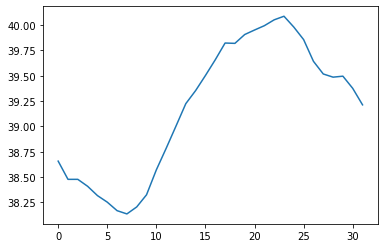

[-0.12934794 -0.174197   -0.34231609 -0.6019971  -0.41211679 -0.28288197
 -0.23181055 -0.22307645 -0.39850281 -0.24033192 -0.28232665 -0.20443325
 -0.28176902 -0.4369091  -0.74049339 -0.51363383 -0.64016882 -0.58795522
 -0.60229181 -0.55802918 -0.90258674 -1.32169943 -1.18482343 -1.23727206
 -1.13828523 -1.25767441 -1.67500597 -1.64049081 -1.34410283 -1.38373096]


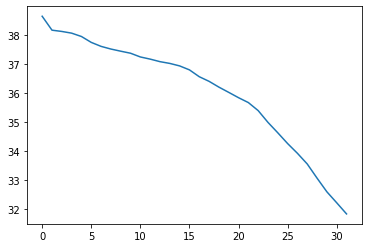

[-0.30607075 -0.15387648 -0.29181139 -0.11809302 -0.29093159 -0.37499303
 -0.45895781 -0.17844397 -0.15212903 -0.43949357 -0.66232811 -0.37302433
 -0.16872482 -0.2677374  -0.47003132 -0.68430711 -0.73012742 -1.10831483
 -0.92901189 -1.15903072 -1.09778898 -0.8763868  -0.94165825 -0.71273783
 -0.57993954 -0.37824938 -0.11934085 -0.53499517 -0.17716478 -0.29935884]


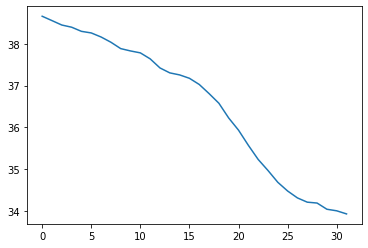

[ 0.14867554  0.3761599   0.58094257  0.45231305  0.38082872  0.36177517
  0.22502526  0.21312203  0.23730485  0.08256691 -0.12314009 -0.14732644
 -0.16393042 -0.08689135  0.08555127  0.08076334  0.06154687  0.23124799
  0.28880595  0.47481276  0.77078112  0.78650677  1.0357456   1.01917512
  1.21273639  1.35025373  1.27139206  1.43538346  1.55521744  1.47962596]


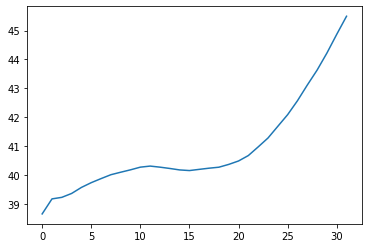

[ 0.24003209  0.38332218  0.19138404  0.23020201  0.08787606  0.51347804
  0.33888423  0.54954337  0.4748762   0.38403225  0.27912535  0.33382714
  0.47593275  0.12444968  0.18517631  0.03010992 -0.06964717 -0.38809385
 -0.39572011 -0.25354108 -0.02669353 -0.31888626 -0.12965322  0.17219976
  0.09480679  0.10501351  0.21608515  0.25650209  0.60615746  0.72772716]


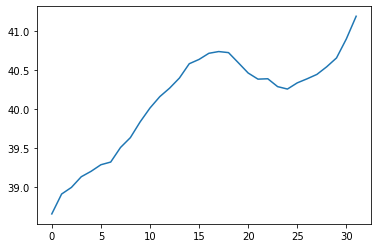

In [48]:
generate_5_simulation_brownien()

# Bootstrap

In [21]:
import math
from random import randint


In [22]:
def Bootstrap():
    valeur = []
    random_index_tricker = randint(0, 30)
    ticker = tickers[random_index_tricker]
    for i in range(30):
        random_index = randint(0, 2260)
        So = RendementMoyen[1]
        valeurAleatoire = RendementMoyen[random_index]
        valeur.append(So + So*(valeurAleatoire))
    plt.plot(valeur)
    plt.show()

In [23]:
def generate_5_simulation():
    for i in range(5):
        Bootstrap()
        

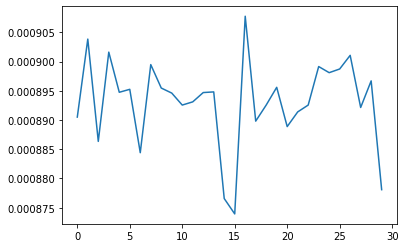

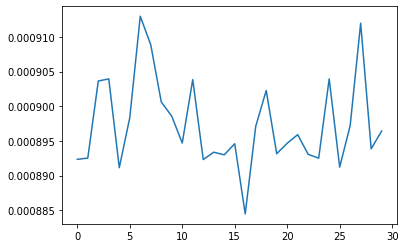

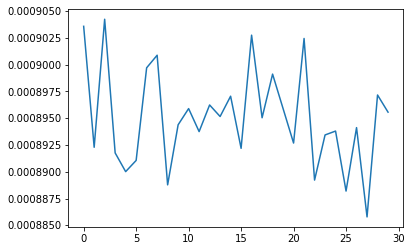

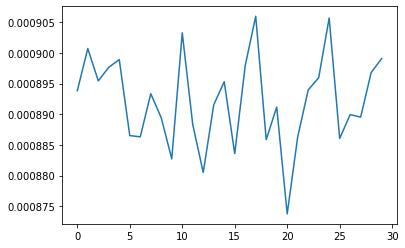

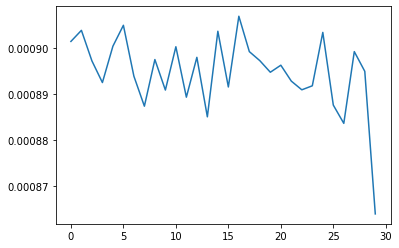

In [24]:
generate_5_simulation()